# Course on Neural Networks and Deep Learning

In [ ]:
%pip install -r requirements.txt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import pandas as pd

## Step 1.1 - How to create a Neural Network
To create a neural network in Pytorch, you need to create a class that extends the torch.nn.Module

The class must have the init method, where you define the layers of the neural network, and the forward method, where you define the forward pass of the neural network.

You could think of each layer in a neural network as performing some kind of relatively simple transformation. Through a deep stack of layers, a neural network can transform its inputs in more and more complex ways. In a well-trained neural network, each layer is a transformation getting us a little bit closer to a solution.

There are many types of layers in Pytorch, such as Linear, Conv2d, MaxPool2d, etc. You can see the complete list of layers in the Pytorch documentation: https://pytorch.org/docs/stable/nn.html

It is important that the amount of input neurons of a layer is equal to the amount of output neurons of the previous layer. The only exception is the first layer, which must have the amount of input neurons equal to the amount of features of the input data and the last layer, which must have the amount of output neurons equal to the amount of classes in the classification task or the amount of output values in the regression task.

### Activation functions
It turns out, however, that dense layers with nothing in between are no better than a single dense layer by itself. Dense layers by themselves can never move us out of the world of lines and planes. What we need is something nonlinear. What we need are activation functions. There are many types of activation functions. The most common are ReLU, Sigmoid, and Tanh. You can see the complete list of activation functions in the Pytorch documentation: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

In this example, we create a deep neural network with 2 hidden layers, each with 3 neurons, and a ReLU activation function after each hidden layer. The output layer has 1 neuron as we are trying to predict a single value namely the sine wave.


In [21]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class SineNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_layer_1 = nn.Linear(1, 3)
        self.hidden_layer_2 = nn.Linear(3, 3)
        self.hidden_layer_3 = nn.Linear(3, 3)

        self.output_layer = nn.Linear(3, 1)

    def forward(self, x):
        hidden_output = self.hidden_layer_1(x)
        hidden_output = F.relu(hidden_output)
        hidden_output = self.hidden_layer_2(hidden_output)
        hidden_output = F.tanh(hidden_output)
        output = self.output_layer(hidden_output)
        return output   

## Step 1.2 How to make an prediction
PyTorch expects inputs to be a tensor of type float.

In [ ]:
input_data = torch.tensor([1]).float()
actual_target = torch.tensor([np.sin(1)])
sine_network = SineNeuralNetwork()

prediction = sine_network(input_data)
print(f"Prediction: {prediction[0]}, Actual: {actual_target[0]}")

## Task 1.1 - Create a Neural Network
You are tasked to create a fully connected neural network that has the following architecture:
- Input Layer: 1 neurons
- Hidden Layer: 3 neurons
- Output Layer: 1 neuron

![Network Structure](images/Network%20Structure.png)

In [ ]:
# TODO Create a neural network 

## Task 1.2 - Make a prediction

In [ ]:
# TODO: add your network and make a prediction here

## Step 2: How to train a Neural Network
When first created, all of the network's weights are set randomly -- the network doesn't "know" anything yet. now we're are going to train a neural network; we're going to see how neural networks learn.

As with all machine learning tasks, we begin with a set of training data. Each example in the training data consists of some features (the inputs) together with an expected target (the output). Training the network means adjusting its weights in such a way that it can transform the features into the target. 

With the dataset we're created for the sine wave, we have a set of input values (the x-values) and a set of target values (the sine of the x-values). We want to train the network to transform the input values into the target values.

If we can successfully train a network to do that, its weights must represent in some way the relationship between those features and that target as expressed in the training data.

When we train the network we must also split the dataset into a training set and a validation set. The training set is used to train the network, while the validation set is used to evaluate the network's performance on data it hasn't seen before. This is an important step to ensure that the network is able to generalize well, that is, to make good predictions on data it wasn't trained on. 


In addition to the training data, we need two more things:
* A "loss function" that measures how good the network's predictions are.
* An "optimizer" that can tell the network how to change its weights.

### Loss Function or Criterion
We've seen how to design an architecture for a network, but we haven't seen how to tell a network what problem to solve. This is the job of the loss function.

The loss function measures the disparity between the the target's true value and the value the model predicts.

Different problems needs different loss functions. For example, for a regression problem we can use the Mean Squared Error Loss. For a classification problem, we can use the Cross Entropy Loss.

### Optimizer - Stochastic Gradient Descent¶

We've described the problem we want the network to solve, but now we need to say how to solve it. This is the job of the optimizer. The optimizer is an algorithm that adjusts the weights to minimize the loss.
The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent. They are iterative algorithms that train a network in steps. One step of training goes like this:

1. Sample some training data and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that makes the loss smaller.



In [ ]:
# Define the number of epochs
epochs = 10

# Generate some data
data = torch.randn(1000, 1)
labels = torch.sin(data)
train_validation_split = int(0.8 * len(data))

# Split the data into training and validation
train_input = data[:train_validation_split]
train_target = labels[:train_validation_split]

validation_input = data[train_validation_split:]
validation_target = labels[train_validation_split:]

# Create the model, loss function and optimizer
model = SineNeuralNetwork()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epoch_losses = []
validation_losses = []

# Train the model
for epoch in trange(epochs):

    epoch_loss = 0
    for input, target in zip(train_input, train_target):
    
        # Forward pass
        output = model(input)
        loss = criterion(output, target)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    
    epoch_losses.append(epoch_loss/len(train_input))
    

    # Calculate the validation loss for visualizing the model's performance
    validation_loss = 0
    for input, target in zip(validation_input, validation_target):
        output = model(input)
        loss = criterion(output, target)
        validation_loss += loss.item()
    
    validation_losses.append(validation_loss/len(validation_input))

# Plot the training and validation losses
plt.plot(epoch_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.legend()



In [ ]:
predictions = model(validation_input)
plt.scatter(validation_input, validation_target, label='True values')
plt.scatter(validation_input, predictions.detach().numpy(), label='Predictions')

## Task 2: Train the Neural Network
Try to improve the performance of the neural network by training it on the given dataset.

Recommended Steps:
* Try to change the number of epochs
* Try to change the learning rate
* Try to change the neural network architecture
  * Add more hidden layers
  * Add more neurons to the hidden layer

In [26]:
# TODO - Fill in the following values
epochs = 
learning_rate = 
model = # Your network here

100%|██████████| 10/10 [00:03<00:00,  2.69it/s]


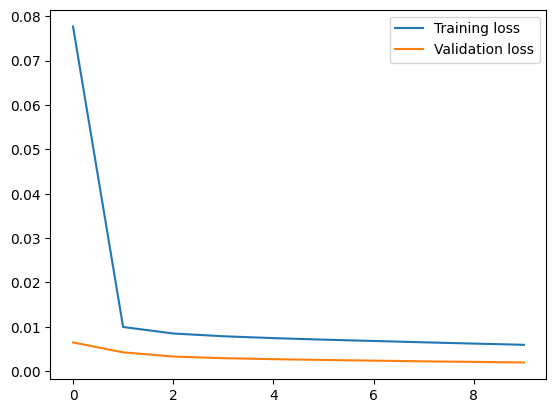

In [27]:
# DO NOT MODIFY THIS CELL

# Generate some data
data = torch.randn(1000, 1)
labels = torch.sin(data)
train_validation_split = int(0.8 * len(data))

# Split the data into training and validation
train_input = data[:train_validation_split]
train_target = labels[:train_validation_split]

validation_input = data[train_validation_split:]
validation_target = labels[train_validation_split:]

# Create the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


epoch_losses = []
validation_losses = []

# Train the model
for epoch in trange(epochs):

    epoch_loss = 0
    for input, target in zip(train_input, train_target):
    
        # Forward pass
        output = model(input)
        loss = criterion(output, target)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    
    epoch_losses.append(epoch_loss/len(train_input))
    

    # Calculate the validation loss for visualizing the model's performance
    validation_loss = 0
    for input, target in zip(validation_input, validation_target):
        output = model(input)
        loss = criterion(output, target)
        validation_loss += loss.item()
    
    validation_losses.append(validation_loss/len(validation_input))

# Plot the training and validation losses
plt.plot(epoch_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.legend()



## Step 3: Compare to the Ground Truth

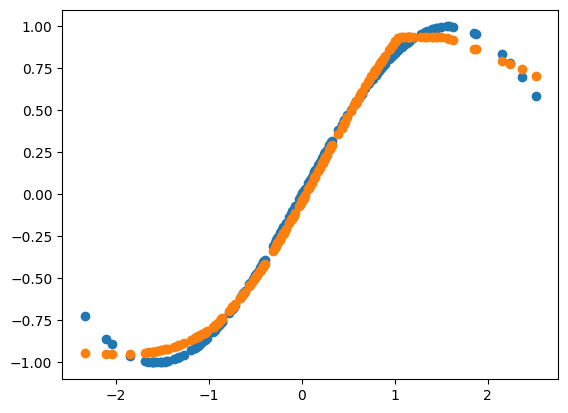

In [28]:
predictions = model(validation_input)
plt.scatter(validation_input, validation_target, label='True values')
plt.scatter(validation_input, predictions.detach().numpy(), label='Predictions')

## Task 4: Competition
Now it is your turn to compete, join together with the people on your table and try to get the best performance on the dataset.

Your goal is to get the highest accuracy on the test dataset.
Try to improve the performance of the neural network by training it on the given dataset.

Recommended Steps:
* Try to change the number of epochs
* Try to change the learning rate
* Try to change the neural network architecture
  * Add more hidden layers
  * Add more neurons to the hidden layers
* Try to change the optimizer
* Try to change the loss function

In [ ]:


epochs =
learning_rate =
model = 
criterion =
optimizer =
train_validation_split_percent = 

In [ ]:
# DO NOT CHANGE ANY CODE IN THIS CELL

# Load the data
original_data = pd.read_csv('data/winequality-red.csv')

# Split the data into input and target
target = original_data['quality']
data = original_data.drop('quality', axis=1)

# Convert the data to PyTorch tensors
data = torch.tensor(data.values).float()
target = torch.tensor(target.values).float()

# Split the data into training and validation
train_validation_split = int(train_validation_split_percent * len(data))
train_input = data[:train_validation_split]
train_target = target[:train_validation_split]

validation_input = data[train_validation_split:]
validation_target = target[train_validation_split:]


In [ ]:
original_data.head()

In [ ]:
# TODO
# Create you model here

class CompetitionNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        pass

    def forward(self, x):
        pass

In [ ]:
# DO NOT MODIFY THIS CELL

epoch_losses = []
validation_losses = []

# Train the model
for epoch in trange(epochs):

    epoch_loss = 0
    for input, target in zip(train_input, train_target):
    
        # Forward pass
        output = model(input)
        loss = criterion(output, target)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    
    epoch_losses.append(epoch_loss/len(train_input))
    

    # Calculate the validation loss for visualizing the model's performance
    validation_loss = 0
    for input, target in zip(validation_input, validation_target):
        output = model(input)
        loss = criterion(output, target)
        validation_loss += loss.item()
    
    validation_losses.append(validation_loss/len(validation_input))

# Plot the training and validation losses
plt.plot(epoch_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.legend()

In [ ]:
test = pd.read_csv('data/test.csv')
test_target = test['quality']
test_features = test.drop('quality', axis=1)
test_features = torch.tensor(test_features.values).float()
test_target = torch.tensor(test_target.values).float()

# Calculate the test loss
test_loss = 0
for input, target in zip(test_features, test_target):
    output = model(input)
    loss = criterion(output, target)
    test_loss += loss.item()

print(f'Test loss: {test_loss/len(test_features)}')